In [8]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import QuantileTransformer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold, RepeatedStratifiedKFold
from imblearn.combine import SMOTEENN
import sys
from ml_template.utils import *
from ml_template.model.ml_model import *
data_df = pd.read_csv('data/train.csv',sep='\t',header=None)
test_df = pd.read_csv('data/test.csv',sep='\t',header=None)

In [9]:
data = data_df.values[:,:-1]
label=(data_df.values[:,-1]+1)//2
qt = QuantileTransformer(n_quantiles=10)
data = qt.fit_transform(data)

In [10]:
# split 9:1 
train_data, train_label, test_data, test_label = KFold_Sampler(data,label,n_splits=10).get_multi_fold_data(n_fold=1)
print(len(train_data),len(test_data),len(test_data)/(len(train_data)+len(test_data)))

# define model list
model_lgb = lgb.LGBMClassifier(is_unbalance=True)

model_dict = {'RF_3':RandomForestClassifier(n_estimators=310,max_depth=3),
              'RF_depth_None':RandomForestClassifier(n_estimators=310),
              'XGB_31_3':XGBClassifier(n_estimators=31,max_depth=3),
              'XGB_310_3':XGBClassifier(n_estimators=31,max_depth=3),
              'XGB_31':XGBClassifier(n_estimators=31),
              'XGB_310':XGBClassifier(n_estimators=310),
              'SVM':SVC(probability=True),
              'SVM_lin':SVC(kernel='linear',probability=True),
              'SVM_rbf':SVC(kernel='rbf',probability=True),
              'SVM_0.2':SVC(C=0.2,probability=True),
              'SVM_0.2_lin':SVC(C=0.2,kernel='linear',probability=True),
              'SVM_0.2_poly':SVC(C=0.2,kernel='poly',probability=True),
              'SVM_5':SVC(C=5,probability=True),
              'SVM_5_lin':SVC(C=5,kernel='linear',probability=True),
              'SVM_5_poly':SVC(C=5,kernel='poly',probability=True),
              # 'KNN_Cls':KNeighborsClassifier(),
              'LGB_Cls':model_lgb,
              # 'Ridge_Cls':RidgeClassifier(),
              # 'MLP_Cls':MLPClassifier(activation = "relu", alpha = 0.001, hidden_layer_sizes = (56,10),
              #               learning_rate = "constant", max_iter = 3000, random_state = 3000,early_stopping=True),
              # 'QDA':QuadraticDiscriminantAnalysis(),
              }
#stack_model=MLPClassifier(activation = "relu", alpha = 0.0001,validation_fraction=0.1, hidden_layer_sizes = (38),learning_rate = "constant", max_iter = 3000, random_state = 1000,early_stopping=True)
# stack_model=SVC(C=1,kernel='linear', probability=True)
#stack_model = DecisionTreeClassifier()
num_model = len(list(model_dict.keys()))
num_classes=2
stack_model=ML_Weighted_Model(num_model,
                              num_classes,
                              epoch=100,
                              model_reg=0.00,
                              classes_reg=0.00,
                              l1_norm=0.00)
model = Stack_Ensemble_Proba_Model(copy.deepcopy(model_dict),stack_model=stack_model,stack_training_split=0.2)
# model = Mean_Ensemble_Proba_Model(copy.deepcopy(model_dict))
cv_model, cv_df = model.cross_validation_evaluate(train_data, train_label, accuracy_score,n_splits=5)

90 10 0.1


Parameter containing:
tensor([[0.2965, 0.2965],
        [0.2948, 0.2948],
        [0.3022, 0.3022],
        [0.3022, 0.3022],
        [0.3040, 0.3040],
        [0.3039, 0.3039],
        [0.7006, 0.7006],
        [0.5226, 0.5226],
        [0.7012, 0.7012],
        [0.6985, 0.6985],
        [0.6910, 0.6910],
        [0.7004, 0.7004],
        [0.6936, 0.6936],
        [0.2390, 0.2390],
        [0.6819, 0.6819],
        [0.2933, 0.2933]], requires_grad=True)




====== CV:0 ======
             model  eval_metric
0      SVM_0.2_lin     0.444444
1        SVM_5_lin     0.611111
2    RF_depth_None     0.666667
3          SVM_lin     0.666667
4             RF_3     0.722222
5     SVM_0.2_poly     0.722222
6          SVM_0.2     0.722222
7            SVM_5     0.777778
8          SVM_rbf     0.777778
9              SVM     0.777778
10         XGB_310     0.777778
11       XGB_310_3     0.777778
12        XGB_31_3     0.777778
13          XGB_31     0.833333
14      SVM_5_poly     0.833333
15         LGB_Cls     0.833333
16  Ensemble Model     0.833333


Parameter containing:
tensor([[0.5602, 0.5602],
        [0.6876, 0.6876],
        [0.6983, 0.6983],
        [0.6983, 0.6983],
        [0.6989, 0.6989],
        [0.6938, 0.6938],
        [0.6941, 0.6941],
        [0.3040, 0.3040],
        [0.6933, 0.6933],
        [0.3050, 0.3050],
        [0.3043, 0.3043],
        [0.2961, 0.2961],
        [0.2981, 0.2981],
        [0.3041, 0.3041],
        [0.6400, 0.6400],
        [0.2974, 0.2974]], requires_grad=True)




====== CV:1 ======
             model  eval_metric
0             RF_3     0.500000
1          SVM_0.2     0.500000
2      SVM_0.2_lin     0.500000
3          XGB_310     0.555556
4          SVM_lin     0.555556
5          LGB_Cls     0.555556
6        SVM_5_lin     0.555556
7    RF_depth_None     0.666667
8           XGB_31     0.666667
9         XGB_31_3     0.722222
10       XGB_310_3     0.722222
11      SVM_5_poly     0.722222
12    SVM_0.2_poly     0.722222
13           SVM_5     0.722222
14         SVM_rbf     0.777778
15             SVM     0.777778
16  Ensemble Model     0.777778


Parameter containing:
tensor([[0.3012, 0.3012],
        [0.2913, 0.2913],
        [0.6856, 0.6856],
        [0.6856, 0.6856],
        [0.6874, 0.6874],
        [0.6959, 0.6959],
        [0.6940, 0.6940],
        [0.3056, 0.3056],
        [0.6928, 0.6928],
        [0.6938, 0.6938],
        [0.3063, 0.3063],
        [0.6712, 0.6712],
        [0.6985, 0.6985],
        [0.3058, 0.3058],
        [0.6961, 0.6961],
        [0.3050, 0.3050]], requires_grad=True)




====== CV:2 ======
             model  eval_metric
0          SVM_lin     0.500000
1        SVM_5_lin     0.555556
2          SVM_0.2     0.555556
3      SVM_0.2_lin     0.555556
4          SVM_rbf     0.611111
5    RF_depth_None     0.611111
6           XGB_31     0.611111
7          XGB_310     0.611111
8              SVM     0.611111
9            SVM_5     0.611111
10    SVM_0.2_poly     0.611111
11      SVM_5_poly     0.666667
12            RF_3     0.666667
13       XGB_310_3     0.666667
14        XGB_31_3     0.666667
15         LGB_Cls     0.666667
16  Ensemble Model     0.666667


Parameter containing:
tensor([[0.2948, 0.2948],
        [0.2927, 0.2927],
        [0.7005, 0.7005],
        [0.7005, 0.7005],
        [0.6839, 0.6839],
        [0.3014, 0.3014],
        [0.6941, 0.6941],
        [0.3006, 0.3006],
        [0.6907, 0.6907],
        [0.3008, 0.3008],
        [0.3029, 0.3029],
        [0.6938, 0.6938],
        [0.7004, 0.7004],
        [0.3026, 0.3026],
        [0.4955, 0.4955],
        [0.3030, 0.3030]], requires_grad=True)




====== CV:3 ======
             model  eval_metric
0      SVM_0.2_lin     0.166667
1          SVM_0.2     0.388889
2          SVM_lin     0.555556
3             RF_3     0.611111
4    RF_depth_None     0.611111
5         XGB_31_3     0.611111
6        XGB_310_3     0.611111
7           XGB_31     0.666667
8       SVM_5_poly     0.666667
9        SVM_5_lin     0.666667
10         LGB_Cls     0.666667
11  Ensemble Model     0.722222
12         XGB_310     0.722222
13           SVM_5     0.777778
14         SVM_rbf     0.777778
15             SVM     0.833333
16    SVM_0.2_poly     0.833333


Parameter containing:
tensor([[0.3021, 0.3021],
        [0.2992, 0.2992],
        [0.6910, 0.6910],
        [0.6910, 0.6910],
        [0.6898, 0.6898],
        [0.6931, 0.6931],
        [0.6917, 0.6917],
        [0.3023, 0.3023],
        [0.2622, 0.2622],
        [0.3002, 0.3002],
        [0.3014, 0.3014],
        [0.2808, 0.2808],
        [0.7023, 0.7023],
        [0.3021, 0.3021],
        [0.7037, 0.7037],
        [0.3022, 0.3022]], requires_grad=True)




====== CV:4 ======
             model  eval_metric
0      SVM_0.2_lin     0.500000
1          SVM_0.2     0.500000
2        SVM_5_lin     0.611111
3          SVM_lin     0.611111
4             RF_3     0.666667
5          LGB_Cls     0.666667
6   Ensemble Model     0.666667
7          XGB_310     0.666667
8           XGB_31     0.666667
9        XGB_310_3     0.666667
10        XGB_31_3     0.666667
11   RF_depth_None     0.722222
12             SVM     0.722222
13    SVM_0.2_poly     0.777778
14      SVM_5_poly     0.777778
15         SVM_rbf     0.777778
16           SVM_5     0.888889

====== CV Mean ======
             model  eval_metric
0      SVM_0.2_lin     0.433333
1          SVM_0.2     0.533333
2          SVM_lin     0.577778
3        SVM_5_lin     0.600000
4             RF_3     0.633333
5    RF_depth_None     0.655556
6          XGB_310     0.666667
7          LGB_Cls     0.677778
8         XGB_31_3     0.688889
9           XGB_31     0.688889
10       XGB_310_3     0.688

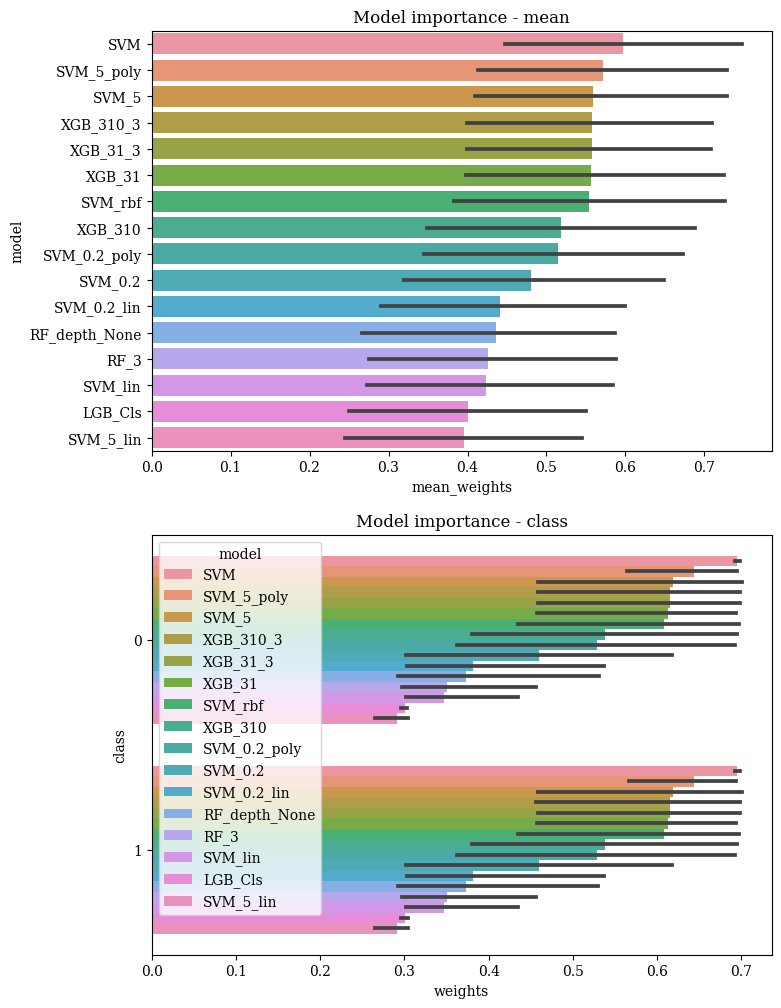

=========== Model Classes Importance ============
model
SVM              0.694890
SVM_5_poly       0.643419
SVM_5            0.618570
XGB_310_3        0.615503
XGB_31_3         0.615503
XGB_31           0.612806
SVM_rbf          0.608062
XGB_310          0.537609
SVM_0.2_poly     0.528454
SVM_0.2          0.459650
SVM_0.2_lin      0.381180
RF_depth_None    0.373130
RF_3             0.350993
SVM_lin          0.347017
LGB_Cls          0.300184
SVM_5_lin        0.290713
Name: weights, dtype: float32
                      weights
class model                  
0     SVM            0.694890
      SVM_5_poly     0.643419
      SVM_5          0.618570
      XGB_310_3      0.615503
      XGB_31_3       0.615503
      XGB_31         0.612806
      SVM_rbf        0.608062
      XGB_310        0.537609
      SVM_0.2_poly   0.528454
      SVM_0.2        0.459650
      SVM_0.2_lin    0.381180
      RF_depth_None  0.373130
      RF_3           0.350993
      SVM_lin        0.347017
      LGB_Cls     

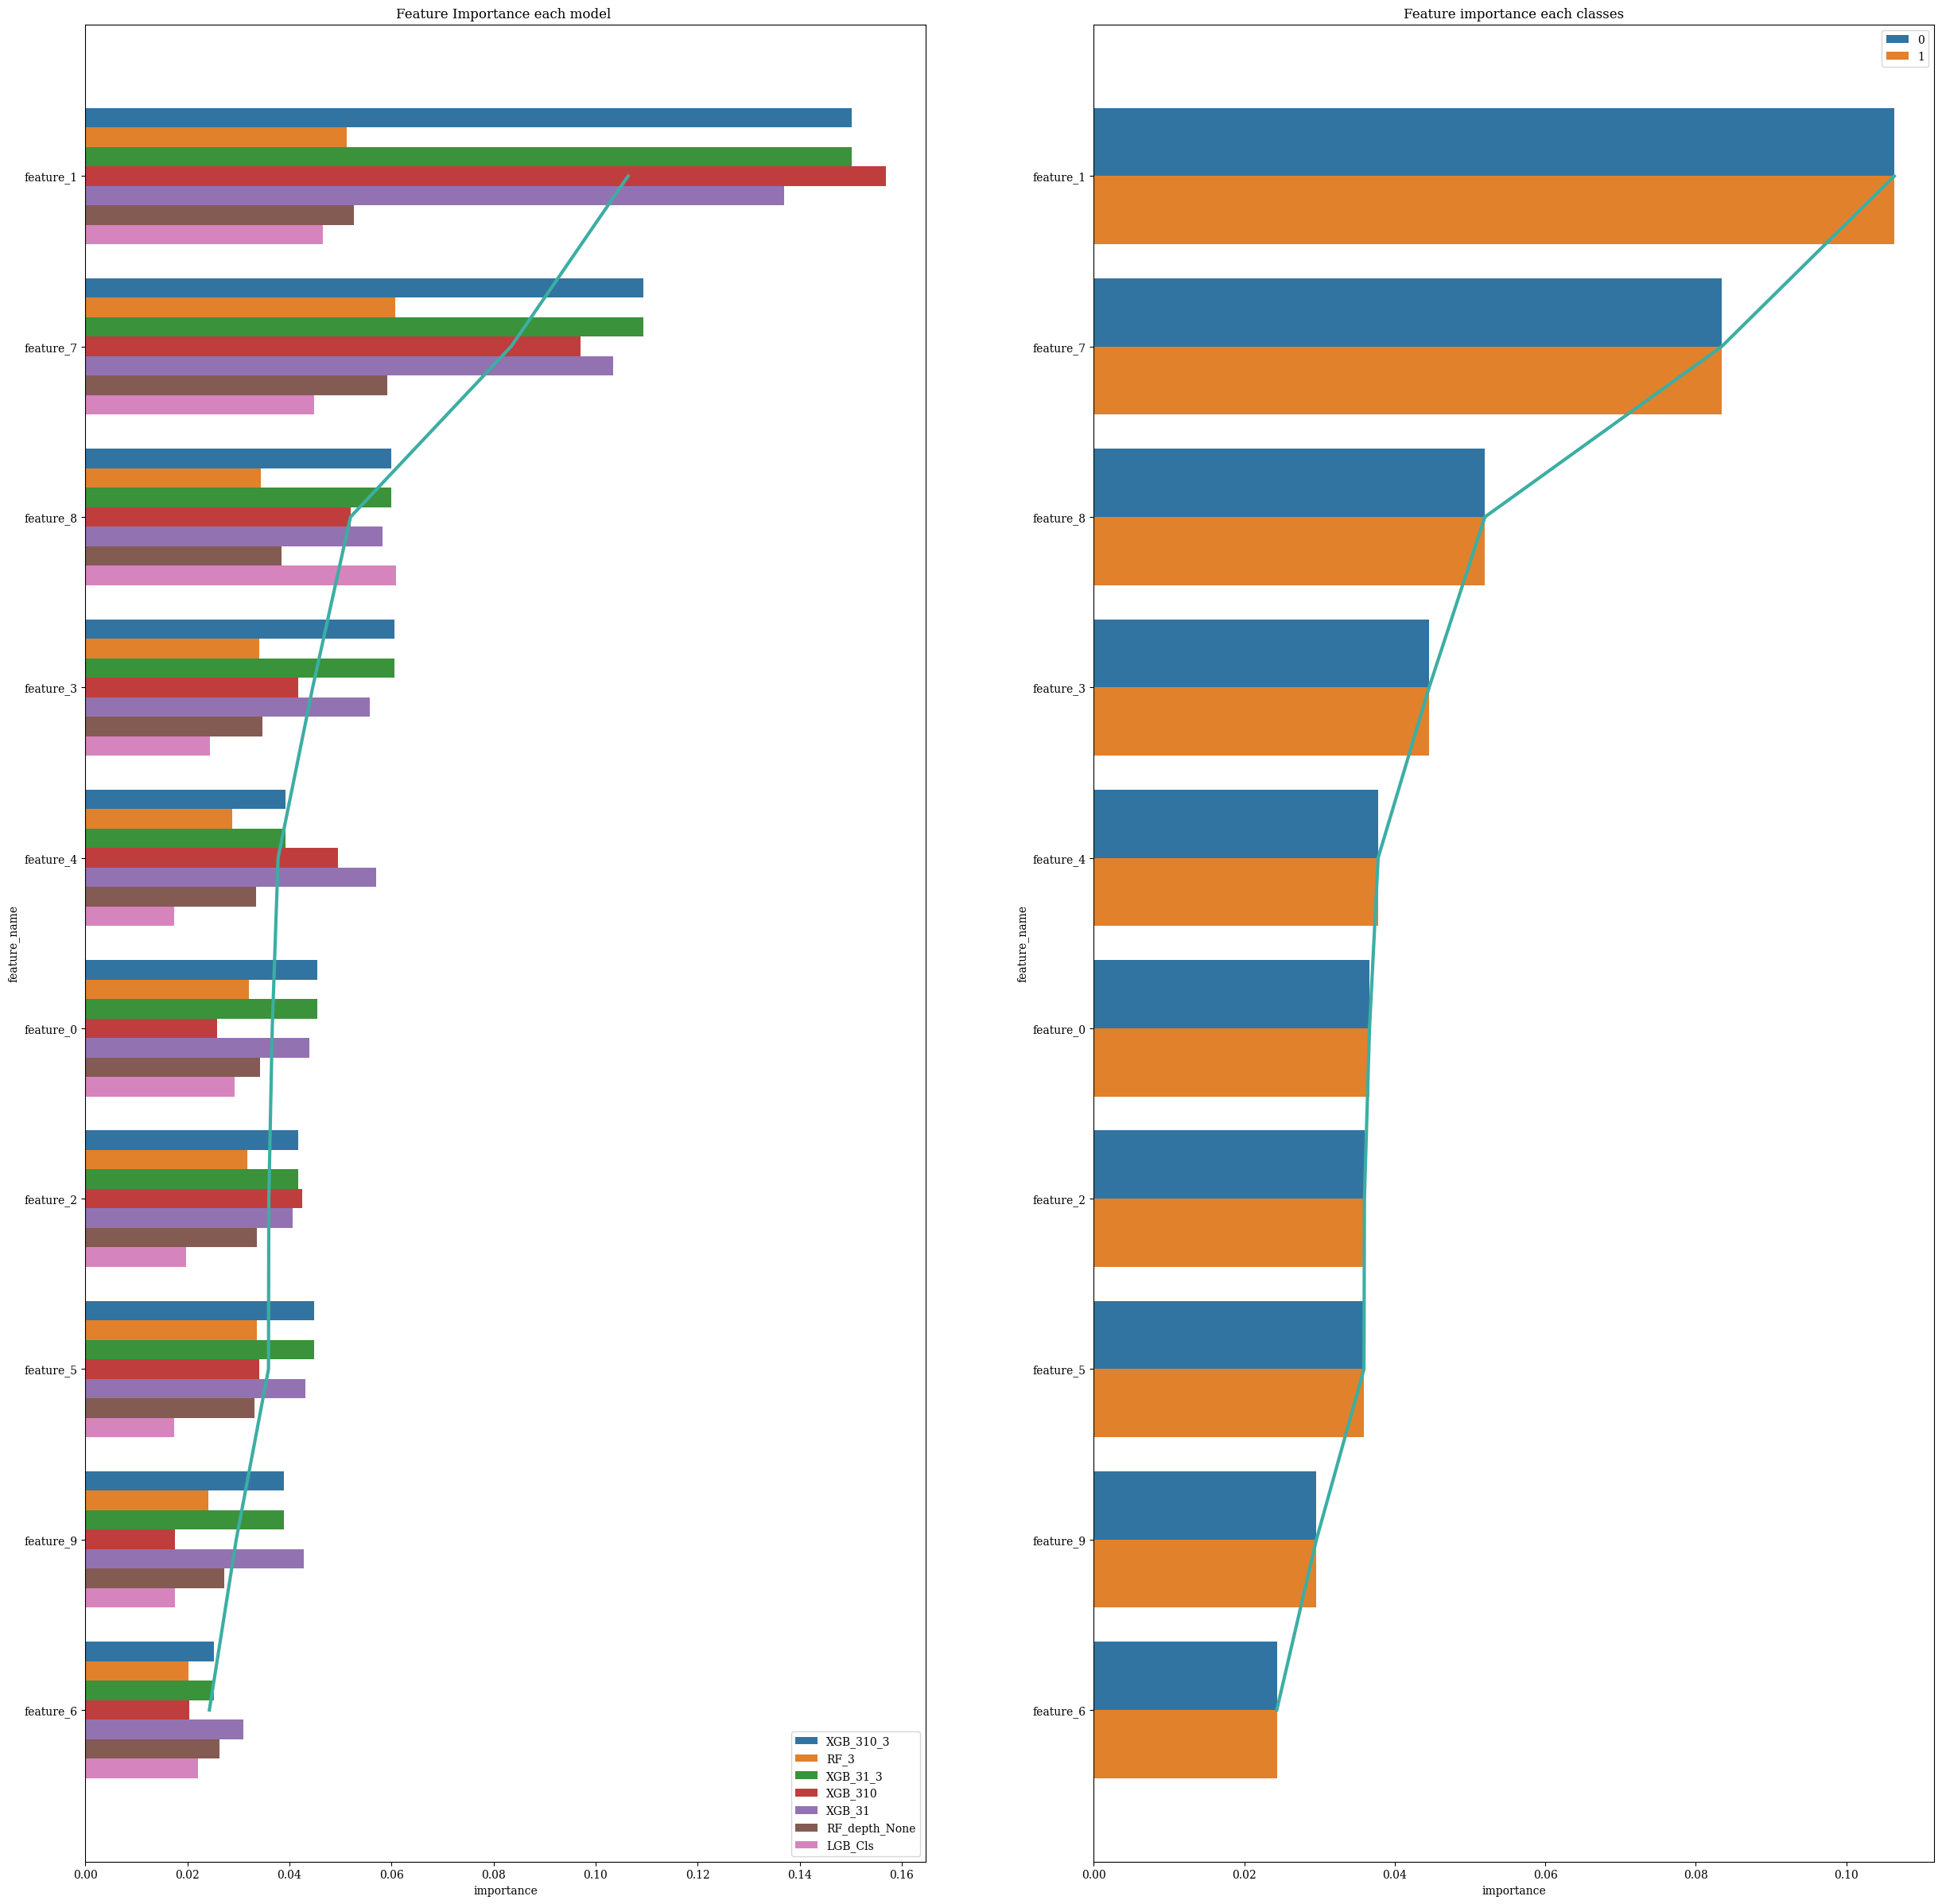

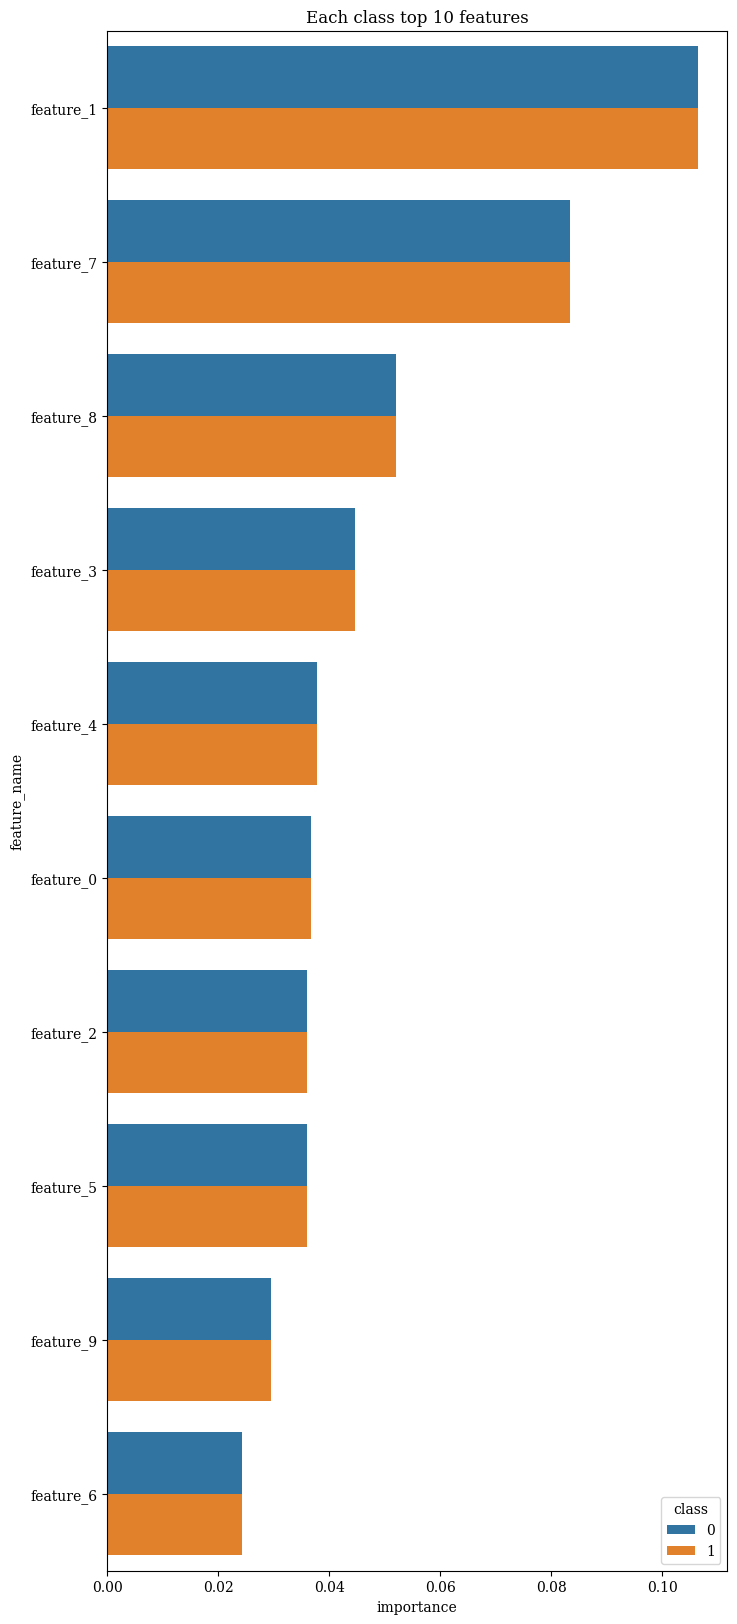

In [11]:
stacking_analysis_df = weighted_stacking_analysis(cv_model, [f'feature_{i}'for i in range(10)])

In [12]:

#stack_model = DecisionTreeClassifier()
# cv_ensemble_model = Stack_Ensemble_Proba_Model(model_dict=cv_model, stack_model=copy.deepcopy(stack_model), stack_training_split=0.3)
cv_ensemble_model = Mean_Ensemble_Proba_Model(cv_model)
# cv_ensemble_model.fit(train_data,train_label)
# # cv_ensemble_model.fit(train_data,train_label)
# print('========== Ensemble Model ==========')
# _=model.evaluate(test_data,test_label,evaluation_fn=accuracy_score,verbose=True)
print('========== CV Ensemble Model ==========')
_=cv_ensemble_model.evaluate(test_data,test_label,evaluation_fn=accuracy_score,verbose=True)

========== CV Ensemble Model ==========
            model  eval_metric
0         model_1          0.6
1         model_2          0.7
2         model_3          0.8
3         model_5          0.9
4  Ensemble Model          0.9
5         model_4          1.0


In [17]:
_=cv_ensemble_model.evaluate(train_data,train_label,accuracy_score)

            model  eval_metric
0         model_3     0.933333
1         model_5     0.933333
2         model_4     0.944444
3         model_2     0.955556
4         model_1     0.966667
5  Ensemble Model     1.000000


In [18]:
test_data = test_df.values[:,1:]
test_pred = cv_ensemble_model.predict(test_data)
test_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,